# Mediapipe  " Image Background Change Demo "

In [ ]:
# ipmotr labraries

In [32]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from time import time

In [33]:
# Initializing mediapipe segmentation class.
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# Setting up Segmentation function.
segment = mp_selfie_segmentation.SelfieSegmentation()

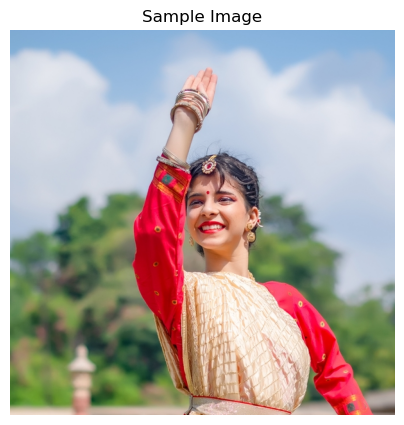

In [68]:
# Read an image from the specified path.
sample_img = cv2.imread('D:/Software/MLDemo/templates/sample.jpg')

# Specify a size of the figure.
plt.figure(figsize = [5, 5])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

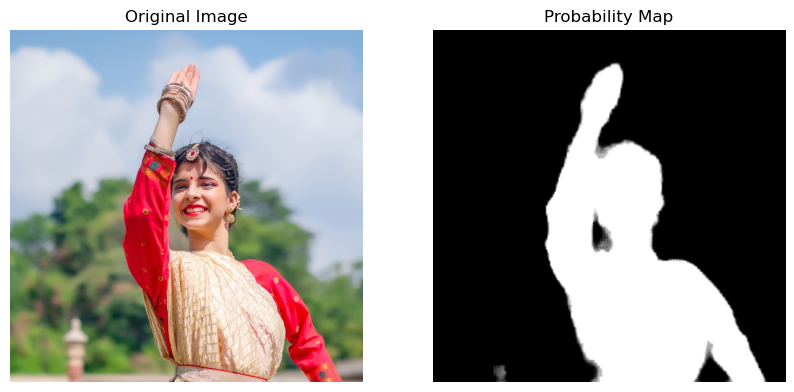

In [69]:
# Convert the sample image from BGR to RGB format.
RGB_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Perform the segmentation.
result = segment.process(RGB_sample_img)

# Specify a size of the figure.
plt.figure(figsize=[10,10])

# Display the original sample image and the segmentation result with appropriate titles. 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(result.segmentation_mask, cmap='gray');plt.title("Probability Map");plt.axis('off');

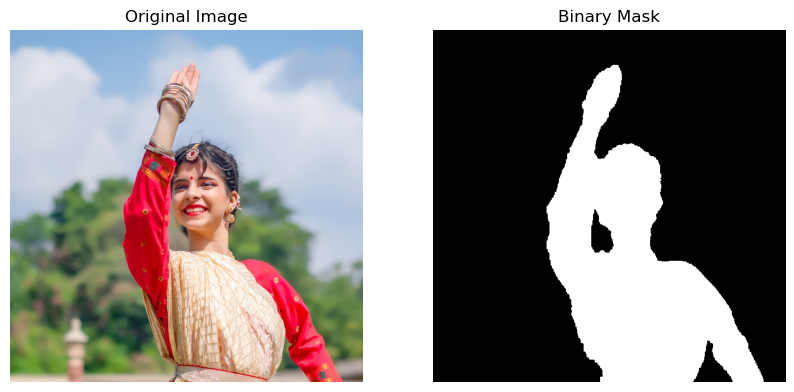

In [70]:
# Get a binary mask having pixel value 1 for the person and 0 for the background.
# Pixel values greater than the threshold value 0.9 (90% Confidence) will become 1 and the remaining will become 0.
binary_mask = result.segmentation_mask > 0.9


# Display the original sample image and the binary mask with appropriate titles. 
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');

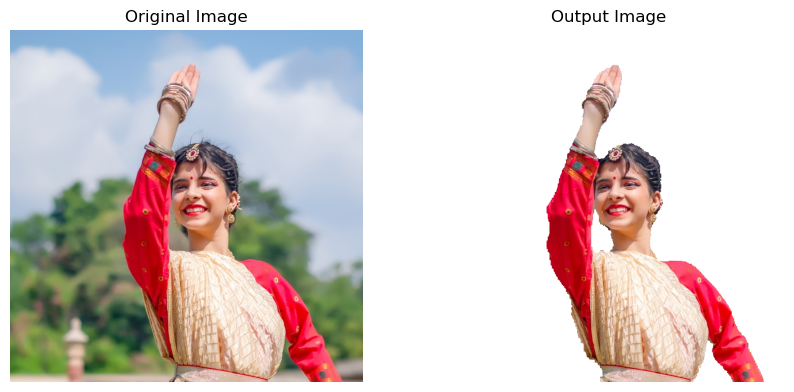

In [71]:
# Stack the same mask three times to make it a three channel image.
binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))

# Create the output image to have white background where ever black is present in the mask.
output_image = np.where(binary_mask_3, sample_img, 255)    

# Specify a size of the figure.
plt.figure(figsize=[10,10])

# Display the original sample image and the resultant image. 
plt.subplot(121);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

TypeError: Image data of dtype object cannot be converted to float

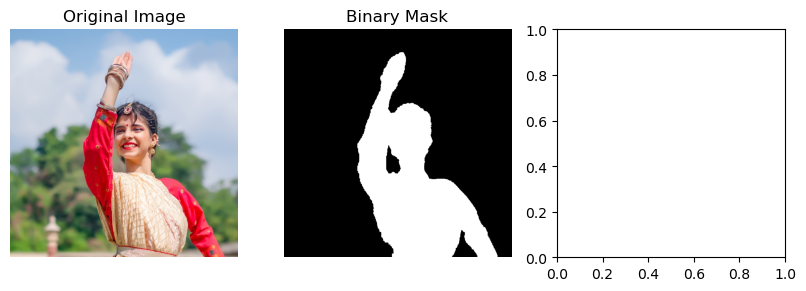

In [76]:
# Read a background image from the specified path.
bg_img = cv2.imread('D:/Software/MLDemo/templates/sample2.jpg')

# Create an output image with the pixel values from the original sample image at the indexes where the mask have 
# value 1 and replace the other pixel values (where mask have zero) with the new background image.
output_image = np.where(binary_mask_3, sample_img, bg_img)     

# Display the original sample image and the segmentation result
plt.figure(figsize=[10,10])
plt.subplot(131);plt.imshow(sample_img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(132);plt.imshow(binary_mask, cmap='gray');plt.title("Binary Mask");plt.axis('off');
plt.subplot(133);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

In [57]:
def modifyBackground(image, background_image = 255, blur = 95, threshold = 0.3, display = True, method='changeBackground'):
    '''
    This function will replace, blur, desature or make the background transparent depending upon the passed arguments.
    Args:
        image: The input image with an object whose background is required to modify.
        background_image: The new background image for the object in the input image.
        threshold: A threshold value between 0 and 1 which will be used in creating a binary mask of the input image.
        display: A boolean value that is if true the function displays the original input image and the resultant image 
                 and returns nothing.
        method: The method name which is required to modify the background of the input image.
    Returns:
        output_image: The image of the object from the input image with a modified background.
        binary_mask_3: A binary mask of the input image. 
    '''

    # Convert the input image from BGR to RGB format.
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the segmentation.
    result = segment.process(RGB_img)
    
    # Get a binary mask having pixel value 1 for the object and 0 for the background.
    # Pixel values greater than the threshold value will become 1 and the remainings will become 0.
    binary_mask = result.segmentation_mask > threshold
    
    # Stack the same mask three times to make it a three channel image.
    binary_mask_3 = np.dstack((binary_mask,binary_mask,binary_mask))
    
    if method == 'changeBackground':
    
        # Resize the background image to become equal to the size of the input image.
        background_image = cv2.resize(background_image, (image.shape[1], image.shape[0]))


        # Create an output image with the pixel values from the original sample image at the indexes where the mask have 
        # value 1 and replace the other pixel values (where mask have zero) with the new background image.
        output_image = np.where(binary_mask_3, image, background_image)

        
    elif method == 'blurBackground':
        
        # Create a blurred copy of the input image.
        blurred_image = cv2.GaussianBlur(image, (blur, blur), 0)

        # Create an output image with the pixel values from the original sample image at the indexes where the mask have 
        # value 1 and replace the other pixel values (where mask have zero) with the new background image.
        output_image = np.where(binary_mask_3, image, blurred_image)
    
    elif method == 'desatureBackground':
        
        # Create a gray-scale copy of the input image.
        grayscale = cv2.cvtColor(src = image, code = cv2.COLOR_BGR2GRAY)

        # Stack the same grayscale image three times to make it a three channel image.
        grayscale_3 = np.dstack((grayscale,grayscale,grayscale))

        # Create an output image with the pixel values from the original sample image at the indexes where the mask have 
        # value 1 and replace the other pixel values (where mask have zero) with the new background image.
        output_image = np.where(binary_mask_3, image, grayscale_3)
        
    elif method == 'transparentBackground':
        
        # Stack the input image and the mask image to get a four channel image. 
        # Here the mask image will act as an alpha channel. 
        # Also multiply the mask with 255 to convert all the 1s into 255.  
        output_image = np.dstack((image, binary_mask * 255))
        
    else:
        # Display the error message.
        print('Invalid Method')
        
        # Return
        return
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    
    # Otherwise
    else:
        
        # Return the output image and the binary mask.
        # Also convert all the 1s in the mask into 255 and the 0s will remain the same.
        # The mask is returned in case you want to troubleshoot.
        return output_image, (binary_mask_3 * 255).astype('uint8')

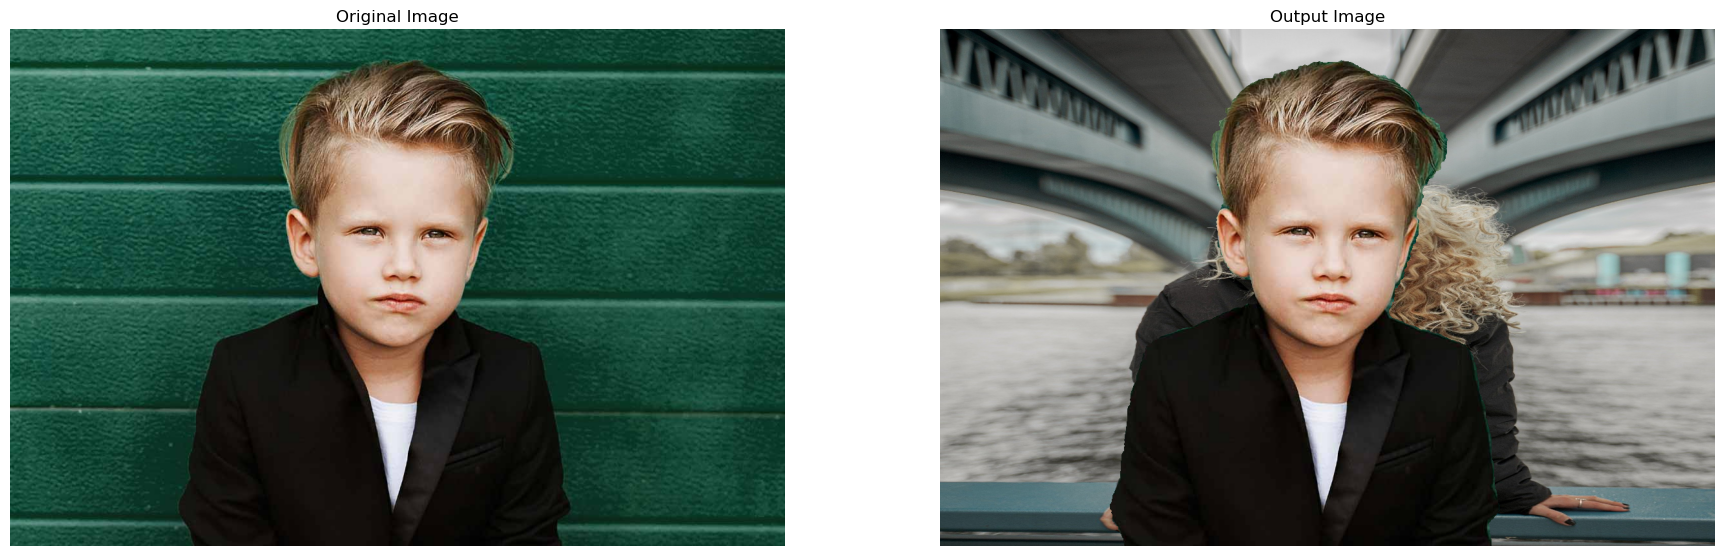

In [60]:
# Read a sample image and change background
image2 = cv2.imread('D:/Software/MLDemo/templates/sample5.jpg')
modifyBackground(image2, bg_img.copy(), method='changeBackground')

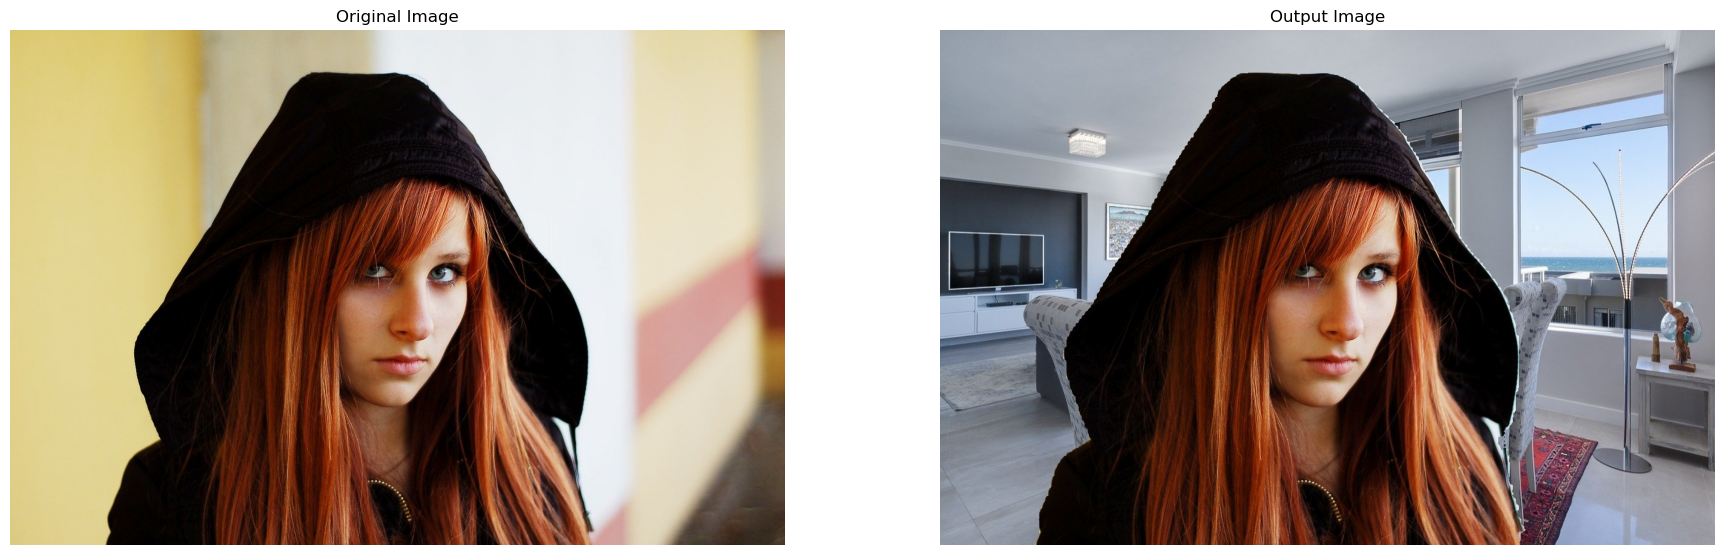

In [64]:
# Read another sample image and a new background and change it.
image3 = cv2.imread('D:/Software/MLDemo/templates/sample6.jpg')
bg_img2 = cv2.imread('D:/Software/MLDemo/templates/backgroundimages/2.jpg')
modifyBackground(image3, bg_img2, 0.7, method='changeBackground')

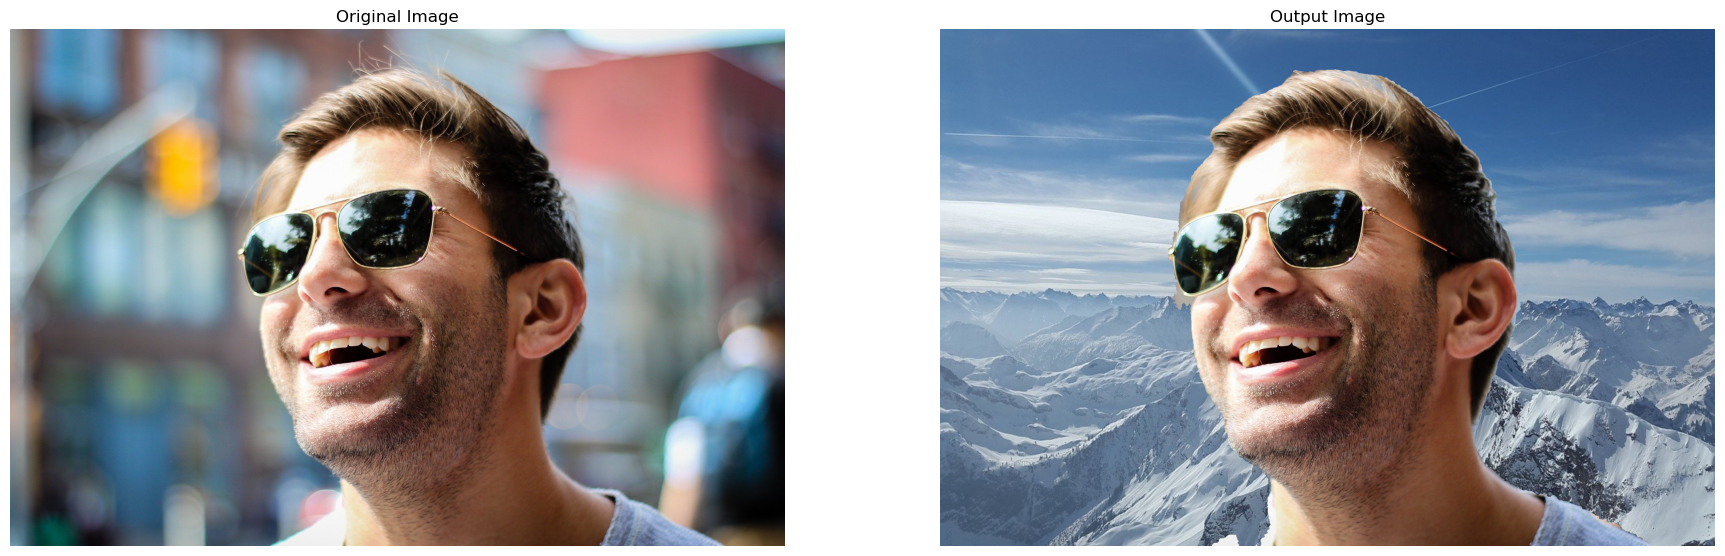

In [65]:
# Read another sample image and a new background and change it.
image4 = cv2.imread('D:/Software/MLDemo/templates/sample4.jpg')
bg_img3 = cv2.imread('D:/Software/MLDemo/templates/backgroundimages/3.jpg')
modifyBackground(image4, bg_img3, 0.55, method='changeBackground')